In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [7]:
#데이터 불러오기
df = pd.read_csv("C:/Ai/DL/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [8]:
#칼럼명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Outcome
0    500
1    268
Name: count, dtype: int64

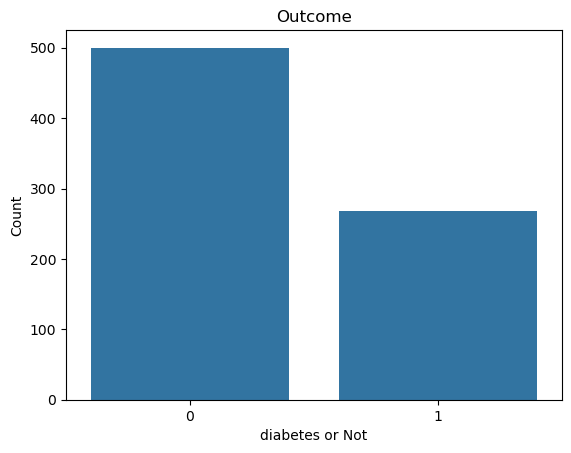

In [11]:
#레이블 갯수 확인
sns.countplot(data = df, x="Outcome")
plt.xlabel("diabetes or Not")
plt.ylabel("Count")
plt.title("Outcome")

df['Outcome'].value_counts()

In [12]:
#결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
#결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\tpfzl\AppData\Local\Temp\ipykernel_3484\2074866824.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Glucose'], kde = True, hist = False, ax=ax1)
C:\Users\tpfzl\AppData\Local\Temp\ipykernel_3484\2074866824.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BloodPress

<Axes: xlabel='BloodPressure', ylabel='Density'>

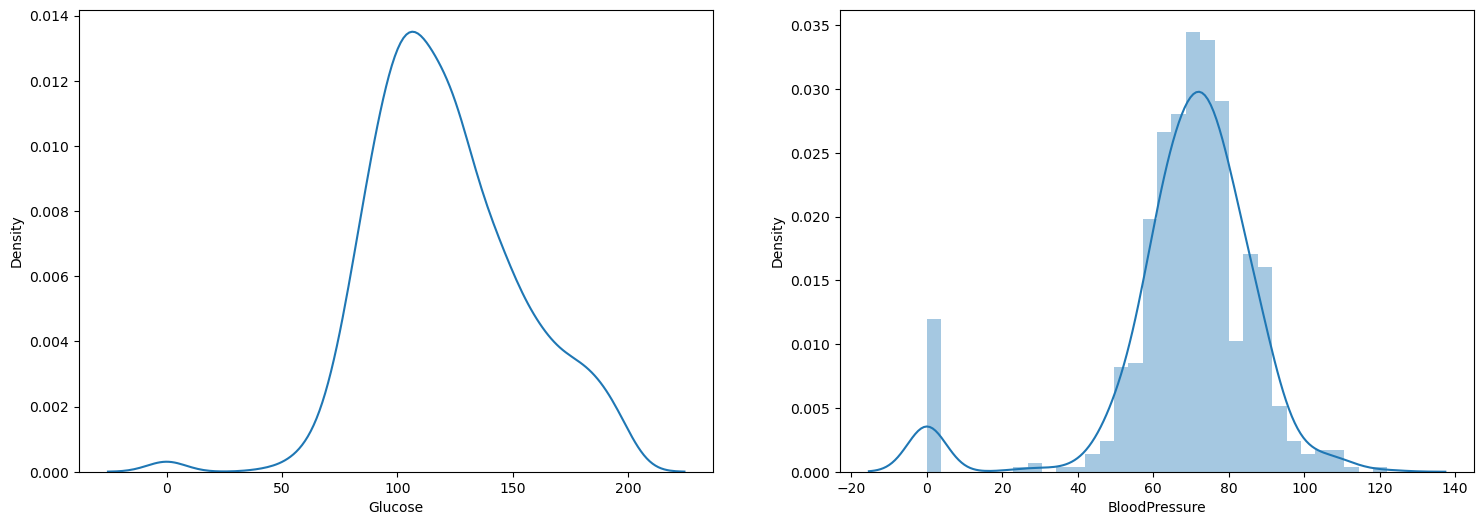

In [14]:
# 컬럼별 히스토그램 확인

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Glucose'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['BloodPressure'], ax=ax2)

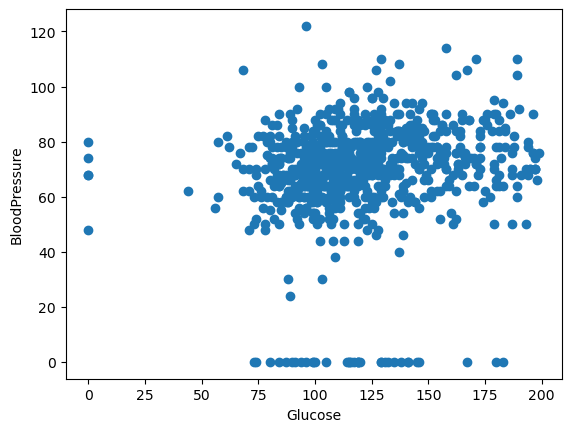

In [15]:

# 산점도 확인

plt.scatter(df['Glucose'], df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

plt.show()

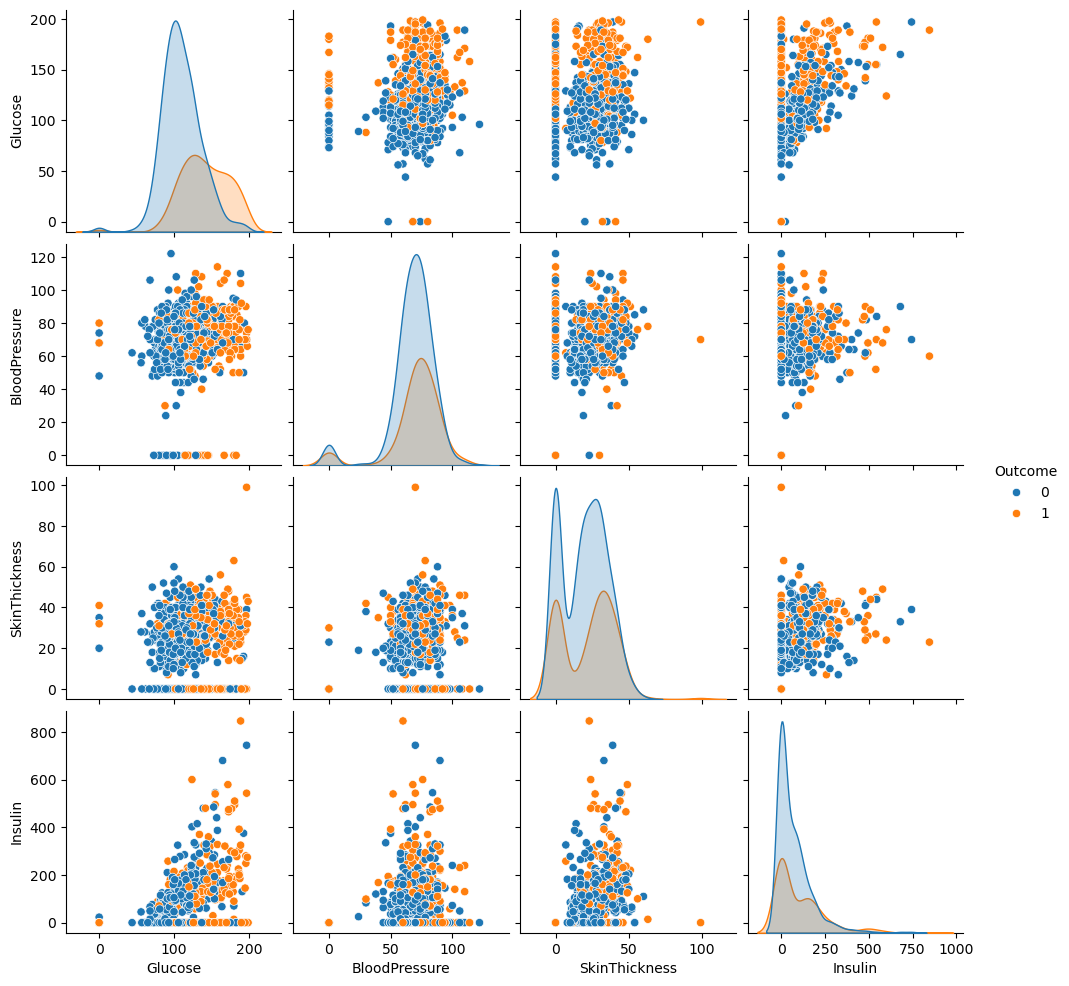

In [16]:

# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'],
            hue ='Outcome')
plt.show()

C:\Users\tpfzl\AppData\Local\Temp\ipykernel_3484\1289762078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Glucose", data=df, palette="Set3")


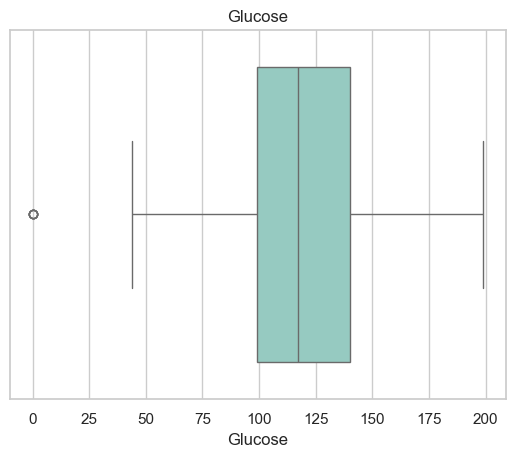

In [17]:

# 특정 칼럼의 범위 확인 및 outlier 확인, boxplot

sns.set_theme(style="whitegrid")
sns.boxplot(x="Glucose", data=df, palette="Set3")
plt.title("Glucose")
plt.show()

C:\Users\tpfzl\AppData\Local\Temp\ipykernel_3484\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


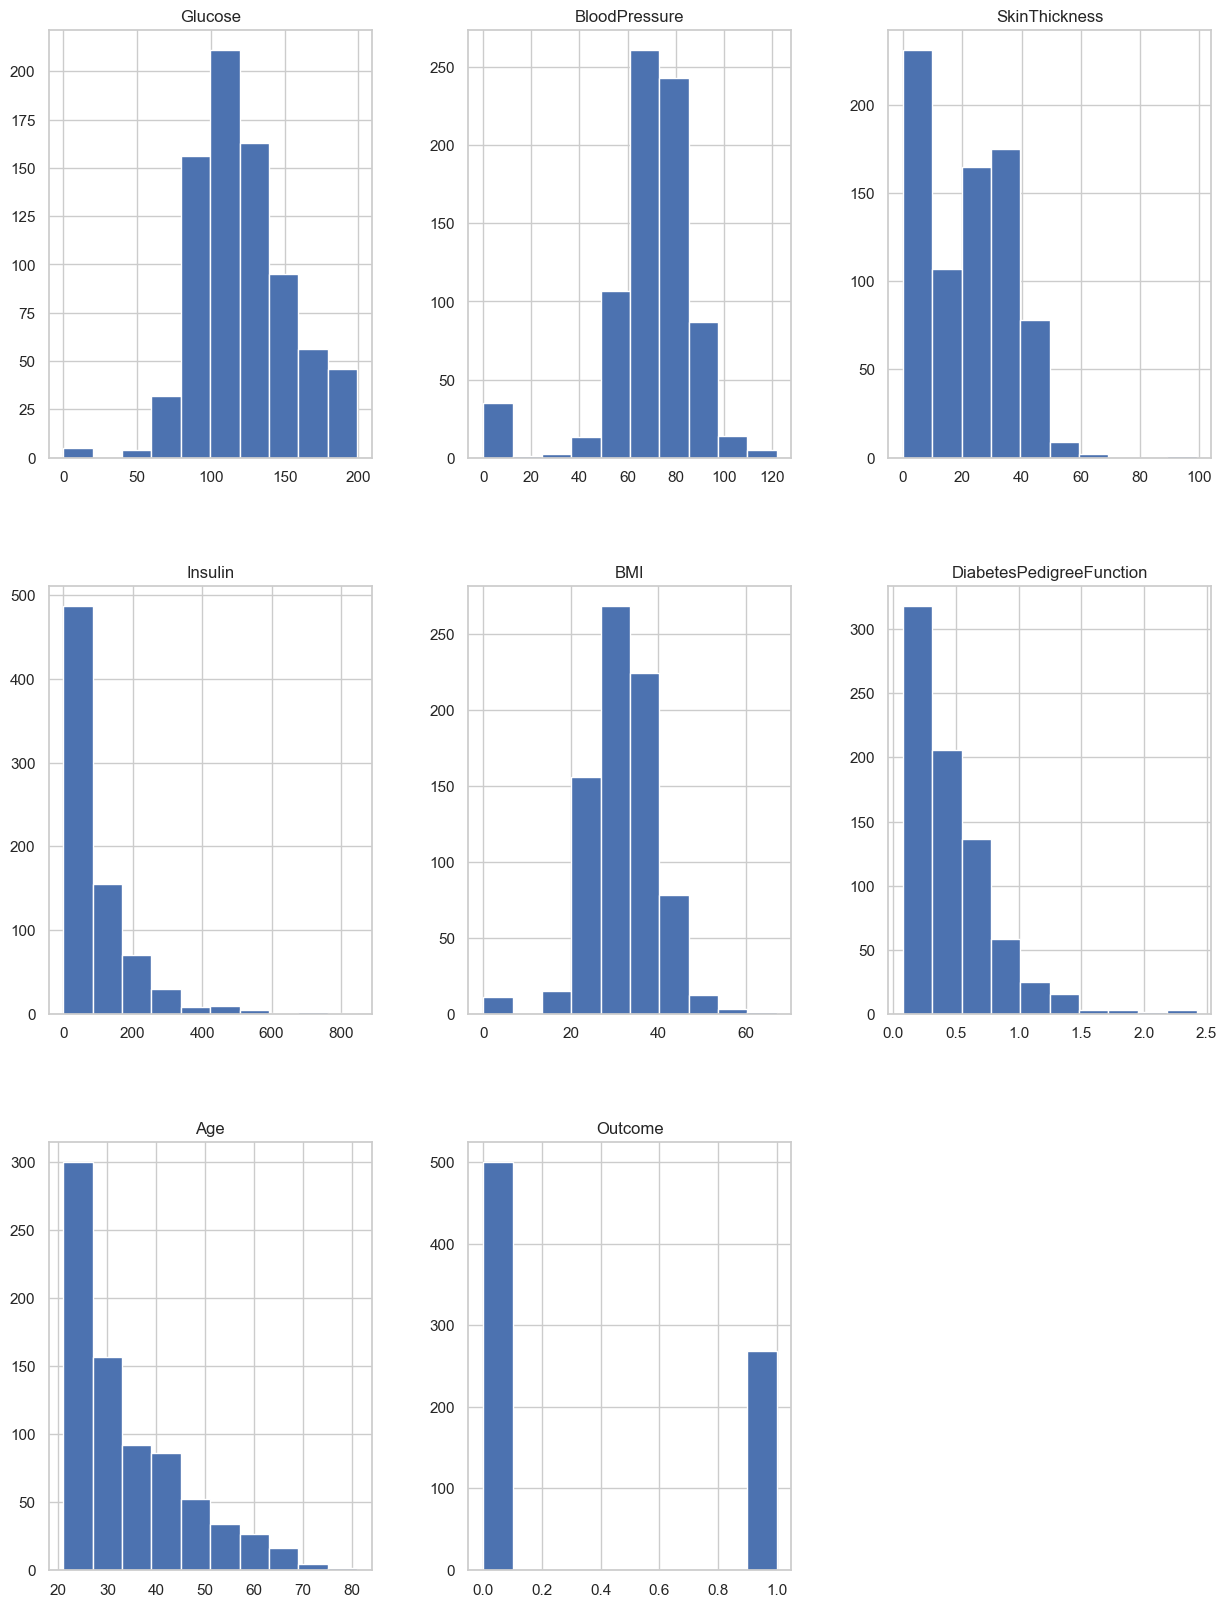

In [18]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [19]:
#
X=df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [21]:
#
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression #선형 분류 모델
from sklearn.svm import SVC #비선형 분류 모델, 데이터셋 많을 시 시간 오래걸림
from sklearn.neural_network import MLPClassifier #다층 퍼셉트론을 구현한 모델, 비선형, 다중 클래스 분
from sklearn.tree import DecisionTreeClassifier #결정트리 기반 분류 알고리즘, 과적합 가능성 높음
from sklearn.metrics import accuracy_score #분류 모델의 정확도 평가, 객관적인 지표 중 하나
from sklearn.metrics import confusion_matrix #모델 성능 평가용 혼동 행렬 생성

In [24]:
#1번쨰 모델 SVM
clf_svm = SVC(random_state=0) #SVC 모델 생성, random_state=0은 모델 결과의 재현성을 위해 난수 생성기의 시드를 설정
clf_svm.fit(X_train, y_train) #모델 학습, X학습데이터 Y레이블

pred_svm = clf_svm.predict(X_test) #test데이터로 예측 수행, 그 결과를 pred_svm에 저장

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm)) #모델의 정확도 계산, (실제레이블, 예측레이블)
print(confusion_matrix(y_test, pred_svm)) #성능평가 TP, FP, TN, FN


--- SVM Classifier ---
0.78125
[[119  11]
 [ 31  31]]


In [25]:
#2번쨰 모델 LR
clf_lr = LogisticRegression(random_state=0) #로지스틱 회귀 분석 모델 생성
clf_lr.fit(X_train, y_train) #모델 훈련

pred_lr = clf_lr.predict(X_test) #모델 테스트

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))  #실제값인 y_test와 예측값인 pred_lr 확인->정확도
print (confusion_matrix(y_test, pred_lr)) # 얼마나 맞추고 어디서 틀렸는지


--- Logistic Regression Classifier ---
0.7916666666666666
[[116  14]
 [ 26  36]]


C:\Users\tpfzl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
#3번째 모델 RF
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore') #파이썬 경고 메세지 무시

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0) #랜덤 포레스트 분류기 모델 생성
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.7760416666666666
[[114  16]
 [ 27  35]]


In [27]:
#4번쨰 모델 DT
clf_dt = DecisionTreeClassifier(random_state=0) #결정 트리 분류기
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.7447916666666666
[[103  27]
 [ 22  40]]


In [33]:
#5번째 모델 KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics

knn = KNeighborsClassifier(n_neighbors=6)
knn

KNeighborsClassifier(n_neighbors=6)

In [34]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [35]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
scores = metrics.accuracy_score(y_test, y_pred)
print(scores)

0.7552083333333334
